In [2]:
import cv2 #untuk mengimport dan menampilkan gambar pada python
import numpy as np #Code ini berfungsi untuk memanggil import numpy yang diinisialkan dengan np
import matplotlib.pyplot as plt #untuk mempermudah pemanggilan library matplotlib.pyplot yang disingkat menjadi plt

In [3]:
LPF = np.array ([0.7071067811865476, 0.7071067811865476]) #permbuatan matriks yang sudah diketahui kernelnya untuk lowpass filter
HPF = np.array ([-0.7071067811865476, 0.7071067811865476]) #permbuatan matriks yang sudah diketahui kernelnya untuk highpass filter

In [4]:
#tampilkan hasil 2 gambar
def show_img2(w, h, citra1, citra2, caption1, caption2):  
    #memanggil fungsi figure dengan lebar dan tinggi mengikuti ukuran w dan h
    plt.figure(figsize=(w,h))
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-1
    plt.subplot(1,2,1)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption1, fontsize=10, color="green")
    #menampilkan gambar imagebaru dengan hanya menggunakan warna hitam dan putih
    plt.imshow(citra1, cmap="gray")
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-2
    plt.subplot(1,2,2)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption2, fontsize=10, color="green")
    #menampilkan gambar
    plt.imshow(citra2, cmap="gray")
    
#tampilkan hasil 4 gambar
def show_img4(w, h, citra1, citra2, citra3, citra4, caption1, caption2, caption3, caption4):  
    #memanggil fungsi figure dengan lebar dan tinggi mengikuti ukuran w dan h
    plt.figure(figsize=(w,h))
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-1
    plt.subplot(2,2,1)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption1, fontsize=10, color="green")
    #menampilkan gambar imagebaru dengan hanya menggunakan warna hitam dan putih
    plt.imshow(citra1, cmap="gray")
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 2 dan urutan ke-2
    plt.subplot(2,2,2)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption2, fontsize=10, color="green")
    #menampilkan gambar
    plt.imshow(citra2, cmap="gray")
    plt.subplot(2,2,3)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption3, fontsize=10, color="green")
    #menampilkan gambar
    plt.imshow(citra3, cmap="gray")
    plt.subplot(2,2,4)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption4, fontsize=10, color="green")
    #menampilkan gambar
    plt.imshow(citra4, cmap="gray")

In [5]:
#membaca dan memanggil gambar.jpg yang disimpan pada variabel image_plt dengan menggunakan library matplotlib dan function imread
image_plt = plt.imread('kucing.jpg')
#membaca dan memanggil gambar.jpg yang disimpan pada variabel image_cv2 dengan menggunakan library cv2 dan function imread
image = cv2.imread('kucing.jpg')
#konversi warna gambar image_cv2 dari RGB ke grayscale image(hitam putih) dengan menggunakan library cv2
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#resize gambar
image = cv2.resize(image,(603,332))
image.shape

(332, 603)

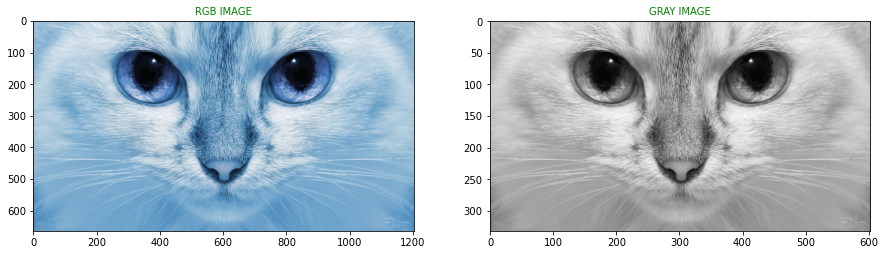

In [6]:
#menampilkan original image dan gray image
show_img2(15, 8, image_plt, image, "RGB IMAGE", "GRAY IMAGE")

NOMOR 1 -> DEKOMPOSISI

In [7]:
image = np.array (image [:,:])
#berfungsi untuk menyimpan masing-masing nilai gray pada gambar

In [8]:
#fungsi otomatis untuk padding
def padding (matriks, jlh_pad):
    padd = np.pad (matriks , [0, jlh_pad], mode = "constant")
    return padd
#Dibuatkannya fungsi padding agar melakukannya secara otomatis terhadap matriks yang memiliki nilai kembalian berupa array

In [9]:
#fungsi untuk melakukan filter pada bagian kolom
def filter_1 (matriks, filter, citra):
    baris, kolom =  citra.shape
    konvol1 = np.zeros ((baris,kolom))
    for i in range (len(konvol1)):
        for j in range (len(konvol1[i])):
            for x in range (len(filter)):
                konvol1[i][j] += (matriks[i][j+x]*filter[x])
    return konvol1

In [10]:
#fungsi untuk melakukan filter pada bagian baris
def filter_2 (matriks, filter, citra):
    baris, kolom =  citra.shape
    konvol1 = np.zeros ((baris,kolom))
    for i in range (len(konvol1)):
        for j in range (len(konvol1[i])):
            for x in range (len(filter)):
                konvol1[i][j] += (matriks[i+x][j]*filter[x])
    return konvol1

In [11]:
#fungsi untuk melakukan downsampling atau penurunan level pada bagian kolom
def downsampling_1(kernel):
    baris,kolom=kernel.shape
    baris=int(baris)
    kolom=int(kolom/2)
    kernel1 = np.zeros((baris,kolom))
    for i in range(baris):
        index = 0
        for j in range(kolom):
            kernel1[i][j] = kernel[i][index]
            index = index + 2
    return kernel1

In [12]:
#fungsi untuk melakukan downsampling atau penurunan level pada bagian baris
def downsampling_2(kernel):
    baris,kolom=kernel.shape
    baris=int(baris/2)
    kolom=int(kolom)
    kernel1 = np.zeros((baris,kolom))
    index = 0
    for i in range(baris):
        for j in range(kolom):
            kernel1[i][j] = kernel[index][j]
        index= index + 2
    return kernel1

In [13]:
#fungsi proses hasil bagi dari masing-masing nilai matriks
def level_1 (LL, LH, HL, HH):
    baris_1 = np.concatenate ((LL, HL), axis = 1)
    baris_2 = np.concatenate ((LH, HH), axis = 1)
    return np.concatenate ((baris_1, baris_2), axis=0)

In [14]:
#proses menentukan nilai, yang mana ada LL (aproximate), LH(horizontal), HL(vertical) dan HH(diagonal)
pad = padding (image, 7)
konvolusi = filter_1(pad, LPF, image)
downsampling = downsampling_1 (konvolusi)
padd = padding (downsampling, 7)
konvolusi2 = filter_2(padd,LPF, downsampling)
approximate = downsampling_2 (konvolusi2)

pad = padding (image, 7)
konvolusi = filter_1(pad, LPF, image)
downsampling = downsampling_1(konvolusi)
padd = padding (downsampling, 7)
konvolusi2 = filter_2(padd,HPF, downsampling)
horizontal = downsampling_2(konvolusi2)

pad = padding (image, 7)
konvolusi = filter_1(pad, HPF, image)
downsampling = downsampling_1 (konvolusi)
padd = padding (downsampling, 7)
konvolusi2 = filter_2(padd,LPF, downsampling)
vertical = downsampling_2 (konvolusi2)

pad = padding (image, 7)
konvolusi = filter_1(pad, HPF, image)
downsampling = downsampling_1 (konvolusi)
padd = padding (downsampling, 7)
konvolusi2 = filter_2(padd,HPF, downsampling)
diagonal = downsampling_2 (konvolusi2)


#Proses transformasi wavelet diskrit dua dimensi dengan level dekomposisi satu level, maka akan #menghasilkan 4 buah matriks subband yaitu LL, HL, LH, dan HH yang mana layer yang ditransformasi #merupakan layer gray.

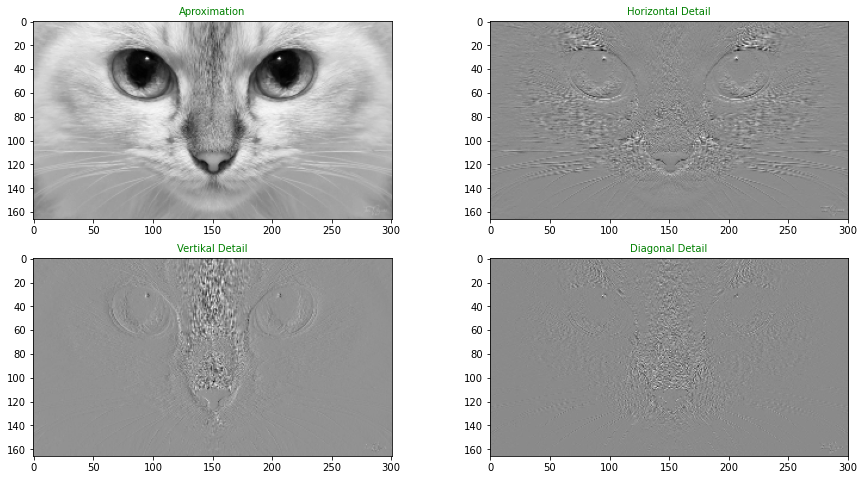

In [15]:
show_img4(15,8, approximate, horizontal, vertical, diagonal, "Aproximation", "Horizontal Detail", "Vertikal Detail", "Diagonal Detail")

NOMOR 2 -> REKONSTRUKSI

In [17]:
# function rekonstruksi
def rekonstruksi(down1, down2, down3, down4):
    timage, limage = down1.shape # mengambil ukuran citra dekomposisi
    t = timage*2; l = limage*2 # menentukan ukuran citra rekonstruksi
    image = np.zeros([t,l]) # wadah citra hasil rekonstruksi
    LL, LH = np.zeros([t,l]), np.zeros([t,l]) # wadah untuk melakukan rekonstruksi
    HL, HH = np.zeros([t,l]), np.zeros([t,l]) # wadah untuk melakukan rekonstruksi
    
    # memberikan ruang kosong pada matrix
    for i in range(0,t,2):
        for j in range(0,l,2):
            LL[i][j] = down1[int(i/2)][int(j/2)]
            LH[i][j] = down2[int(i/2)][int(j/2)]
            HL[i][j] = down3[int(i/2)][int(j/2)]
            HH[i][j] = down4[int(i/2)][int(j/2)]
    
    # mengisi baris yang kosong pada matrix citra
    for i in range(1,t,2):
        for j in range(l):
            LL[i][j] = LL[i-1][j]
            LH[i][j] -= LH[i-1][j]
            HL[i][j] = HL[i-1][j]
            HH[i][j] -= HH[i-1][j]
            
    # mengisi kolom yang kosong pada matrix citra
    for i in range(t):
        for j in range(1,l,2):
             LL[i][j] = LL[i][j-1]
             LH[i][j] = LH[i][j-1]
             HL[i][j] -= HL[i][j-1]
             HH[i][j] -= HH[i][j-1]
    
    # penggabungan LL, LH, HL, HH ke dalam satu matrix citra
    for i in range(t):
        for j in range(l):
            image[i][j] += (LL[i][j]+LH[i][j]+HL[i][j]+HH[i][j])
    return image # pengembalian nilai berupa gambar

In [18]:
#menjalankan fungsi rekonstruksi
rekon = rekonstruksi(approximate, horizontal, vertical, diagonal)

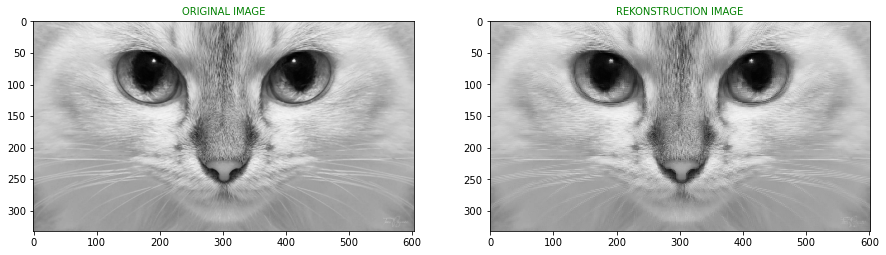

In [19]:
#menampilkan original image dan hasil rekonstruksi
show_img2(15, 8, image, rekon, "ORIGINAL IMAGE", "REKONSTRUCTION IMAGE")